<a href="https://colab.research.google.com/github/Shubham-Niture/S-ML-Assignments/blob/main/Shubham_Niture_Group_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Group A : Heart Disease prediction

### Problem Statement:
  Predict whether a patient has heart disease based on given features.

  Objectives:
  1. Preprocess and explore the dataset.
  2. Train and evaluate classification models (Logistic Regression/Random Forest).
  3. Implement and compare a Neural Network with traditional classifiers.

##Importing all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### Dataset

In [2]:
dataset_path = "/content/drive/MyDrive/Exam_DA1/heart.csv"
data = pd.read_csv(dataset_path)

#### Exploring the dataset

In [3]:
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0     150      0      2.3      0   
1   37    1   2       130   250    0        1     187      0      3.5      0   
2   41    0   1       130   204    0        0     172      0      1.4      2   
3   56    1   1       120   236    0        1     178      0      0.8      2   
4   57    0   0       120   354    0        1     163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [4]:
# Identifing features with missing values
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach     15
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64


#### Handle missing values

The thalach feature was in the str type so I converted it to a numeric value, so that I can use mean to fill the missing values(I tried median and mode as well but it didn't gave any better result)

In [5]:
data['thalach'] = pd.to_numeric(data['thalach'], errors='coerce')

# Handle missing values for 'thalach' using the mean
imputer = SimpleImputer(strategy='mean')
data['thalach'] = imputer.fit_transform(data[['thalach']])

print("\nMissing values in 'thalach' handled.")



Missing values in 'thalach' handled.


In [6]:
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
# Check for data types and outliers
print("\nData types:")
print(data.dtypes)


Data types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


###The discription of the data for getting general overview

In [8]:
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.190813    0.326733    1.039604    1.399340    0.729373   
std   

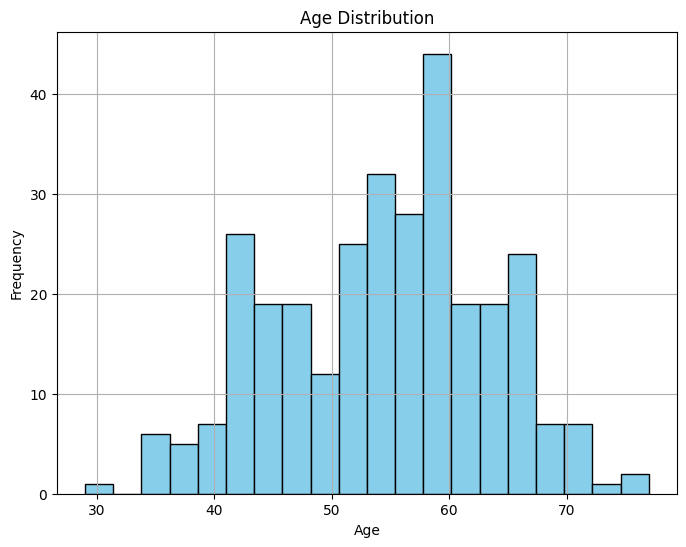

In [9]:
# Age Distribution plot
plt.figure(figsize=(8, 6))
data['age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


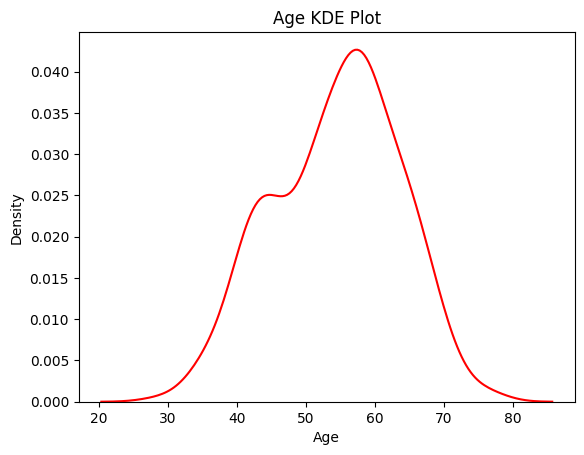

In [10]:
# Checking if age follows a normal distribution
sns.kdeplot(data['age'], color='red')
plt.title('Age KDE Plot')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

#### Data Preparation


In [11]:
# Normalize numeric features
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']  # Including all numeric columns
scaler = MinMaxScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [12]:
print(data.head())

        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.708333    1   3  0.481132  0.244292    1        0  0.603053      0   
1  0.166667    1   2  0.339623  0.283105    0        1  0.885496      0   
2  0.250000    0   1  0.339623  0.178082    0        0  0.770992      0   
3  0.562500    1   1  0.245283  0.251142    0        1  0.816794      0   
4  0.583333    0   0  0.245283  0.520548    0        1  0.702290      1   

    oldpeak  slope   ca  thal  target  
0  0.370968      0  0.0     1       1  
1  0.564516      0  0.0     2       1  
2  0.225806      2  0.0     2       1  
3  0.129032      2  0.0     2       1  
4  0.096774      2  0.0     2       1  


In [13]:
# Encode categorical variables
categorical_features = ['cp', 'thal']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = pd.DataFrame(encoder.fit_transform(data[categorical_features]),
                            columns=encoder.get_feature_names_out(categorical_features))
data = pd.concat([data.drop(columns=categorical_features), encoded_data], axis=1)


Although the data types for cp and thal are integers, they represent categorical variables (e.g., chest pain types and thalassemia types). Encoding these features ensures that machine learning algorithms, particularly Logistic Regression and Neural Networks, treat each category independently without assuming ordinal relationships or numerical significance

### Feature Selection

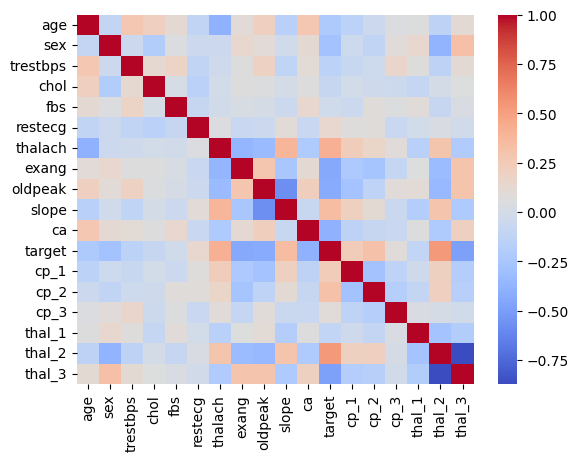

In [14]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.show()


In [15]:
# Removing two features based on low correlation which are 'fbs' & 'restecg'
data = data.drop(columns=['fbs', 'restecg'])

In [16]:
# Splitting dataset
X = data.drop(columns=['target'])  # Features
y = data['target']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression Model

In [17]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_lr = logistic_model.predict(X_test)

### Random Forest Classifier

In [18]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

### Evaluation Metrics (to check how well the model is performing)

In [19]:
metrics = {'Logistic Regression': y_pred_lr, 'Random Forest': y_pred_rf}
for model_name, predictions in metrics.items():
    print(f"\n{model_name} Metrics:")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Precision:", precision_score(y_test, predictions))
    print("Recall:", recall_score(y_test, predictions))
    print("F1-Score:", f1_score(y_test, predictions))


Logistic Regression Metrics:
Accuracy: 0.8688524590163934
Precision: 0.9285714285714286
Recall: 0.8125
F1-Score: 0.8666666666666667

Random Forest Metrics:
Accuracy: 0.8360655737704918
Precision: 0.8666666666666667
Recall: 0.8125
F1-Score: 0.8387096774193549


### Confusion Matrix(to check classification performance)

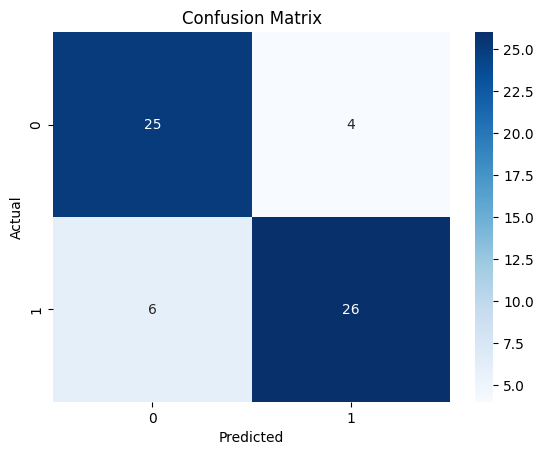

In [20]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Neural Network

In [21]:
nn_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Compile model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - accuracy: 0.4699 - loss: 0.7059 - val_accuracy: 0.4898 - val_loss: 0.6982
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5166 - loss: 0.6902 - val_accuracy: 0.6327 - val_loss: 0.6824
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5917 - loss: 0.6780 - val_accuracy: 0.6327 - val_loss: 0.6689
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5808 - loss: 0.6779 - val_accuracy: 0.7143 - val_loss: 0.6555
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5852 - loss: 0.6622 - val_accuracy: 0.7551 - val_loss: 0.6413
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5768 - loss: 0.6584 - val_accuracy: 0.6939 - val_loss: 0.6295
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5909 - loss: 0.6565 - val_accuracy: 0.7143 - val_loss: 0.6159
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6068 - loss: 0.6306 - val_accuracy: 0.7143 - val_loss: 0.6038


### Evaluate Neural Network

In [23]:
nn_metrics = nn_model.evaluate(X_test, y_test)
print("\nNeural Network Metrics:")
print("Loss:", nn_metrics[0])
print("Accuracy:", nn_metrics[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8928 - loss: 0.3668 

Neural Network Metrics:
Loss: 0.3418791890144348
Accuracy: 0.9016393423080444


### Loss and Accuracy Curves

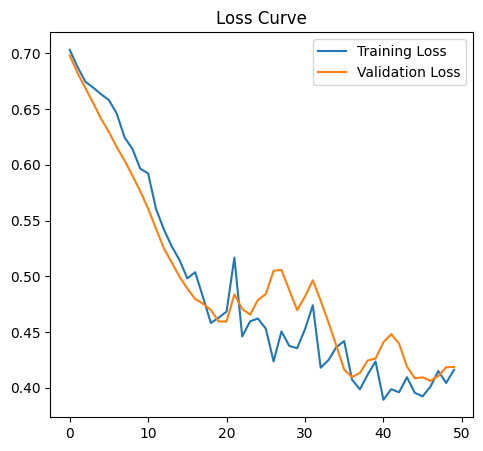

In [24]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.legend()


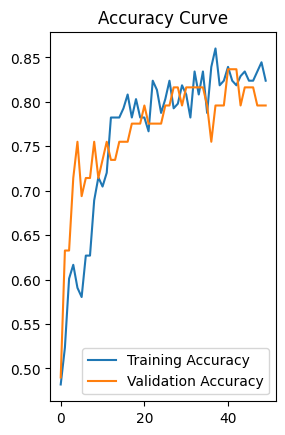

In [25]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()

## Real-World Applications
 These methods are suitable for healthcare scenarios where early detection of diseases is crucial.
 Logistic Regression and Random Forest offer interpretable results, while Neural Networks
 can model complex relationships. For example, this approach can assist in predicting cardiovascular risks based on patient data.
